In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [61]:
df = pd.read_csv('data/train.csv', parse_dates=True, index_col=0)

In [62]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


df['datetime'] = pd.to_datetime(df['datetime'])

df.info()

In [24]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [25]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

df = df.drop(columns = ['casual', 'registered'])

In [26]:
X = df.loc[:,'season':'windspeed']
y = df['count']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
model.score(X_train, y_train)

0.2571066352864877

In [31]:
y_pred = model.predict(X_test)

In [32]:
r2_score(y_test, y_pred)

0.2757033009386365

In [33]:
y_test.shape

(2178,)

In [34]:
y_pred.shape

(2178,)

In [35]:
X_test.shape

(2178, 8)

In [36]:
model.score(X_test, y_test)

0.2757033009386365

<AxesSubplot:>

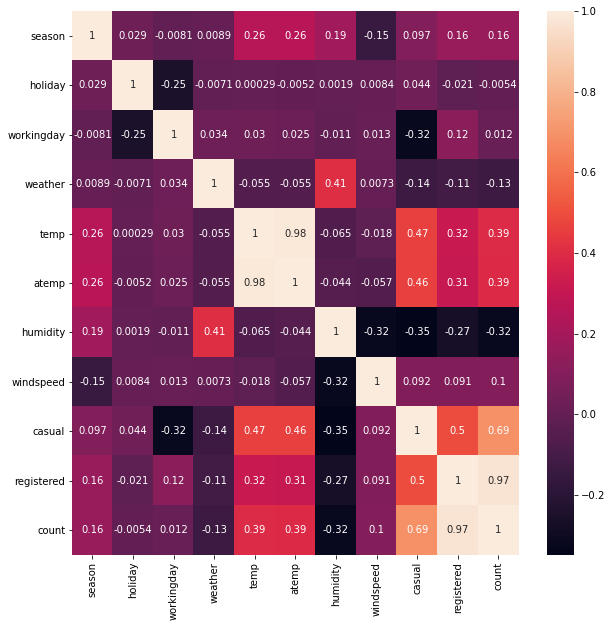

In [37]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True)

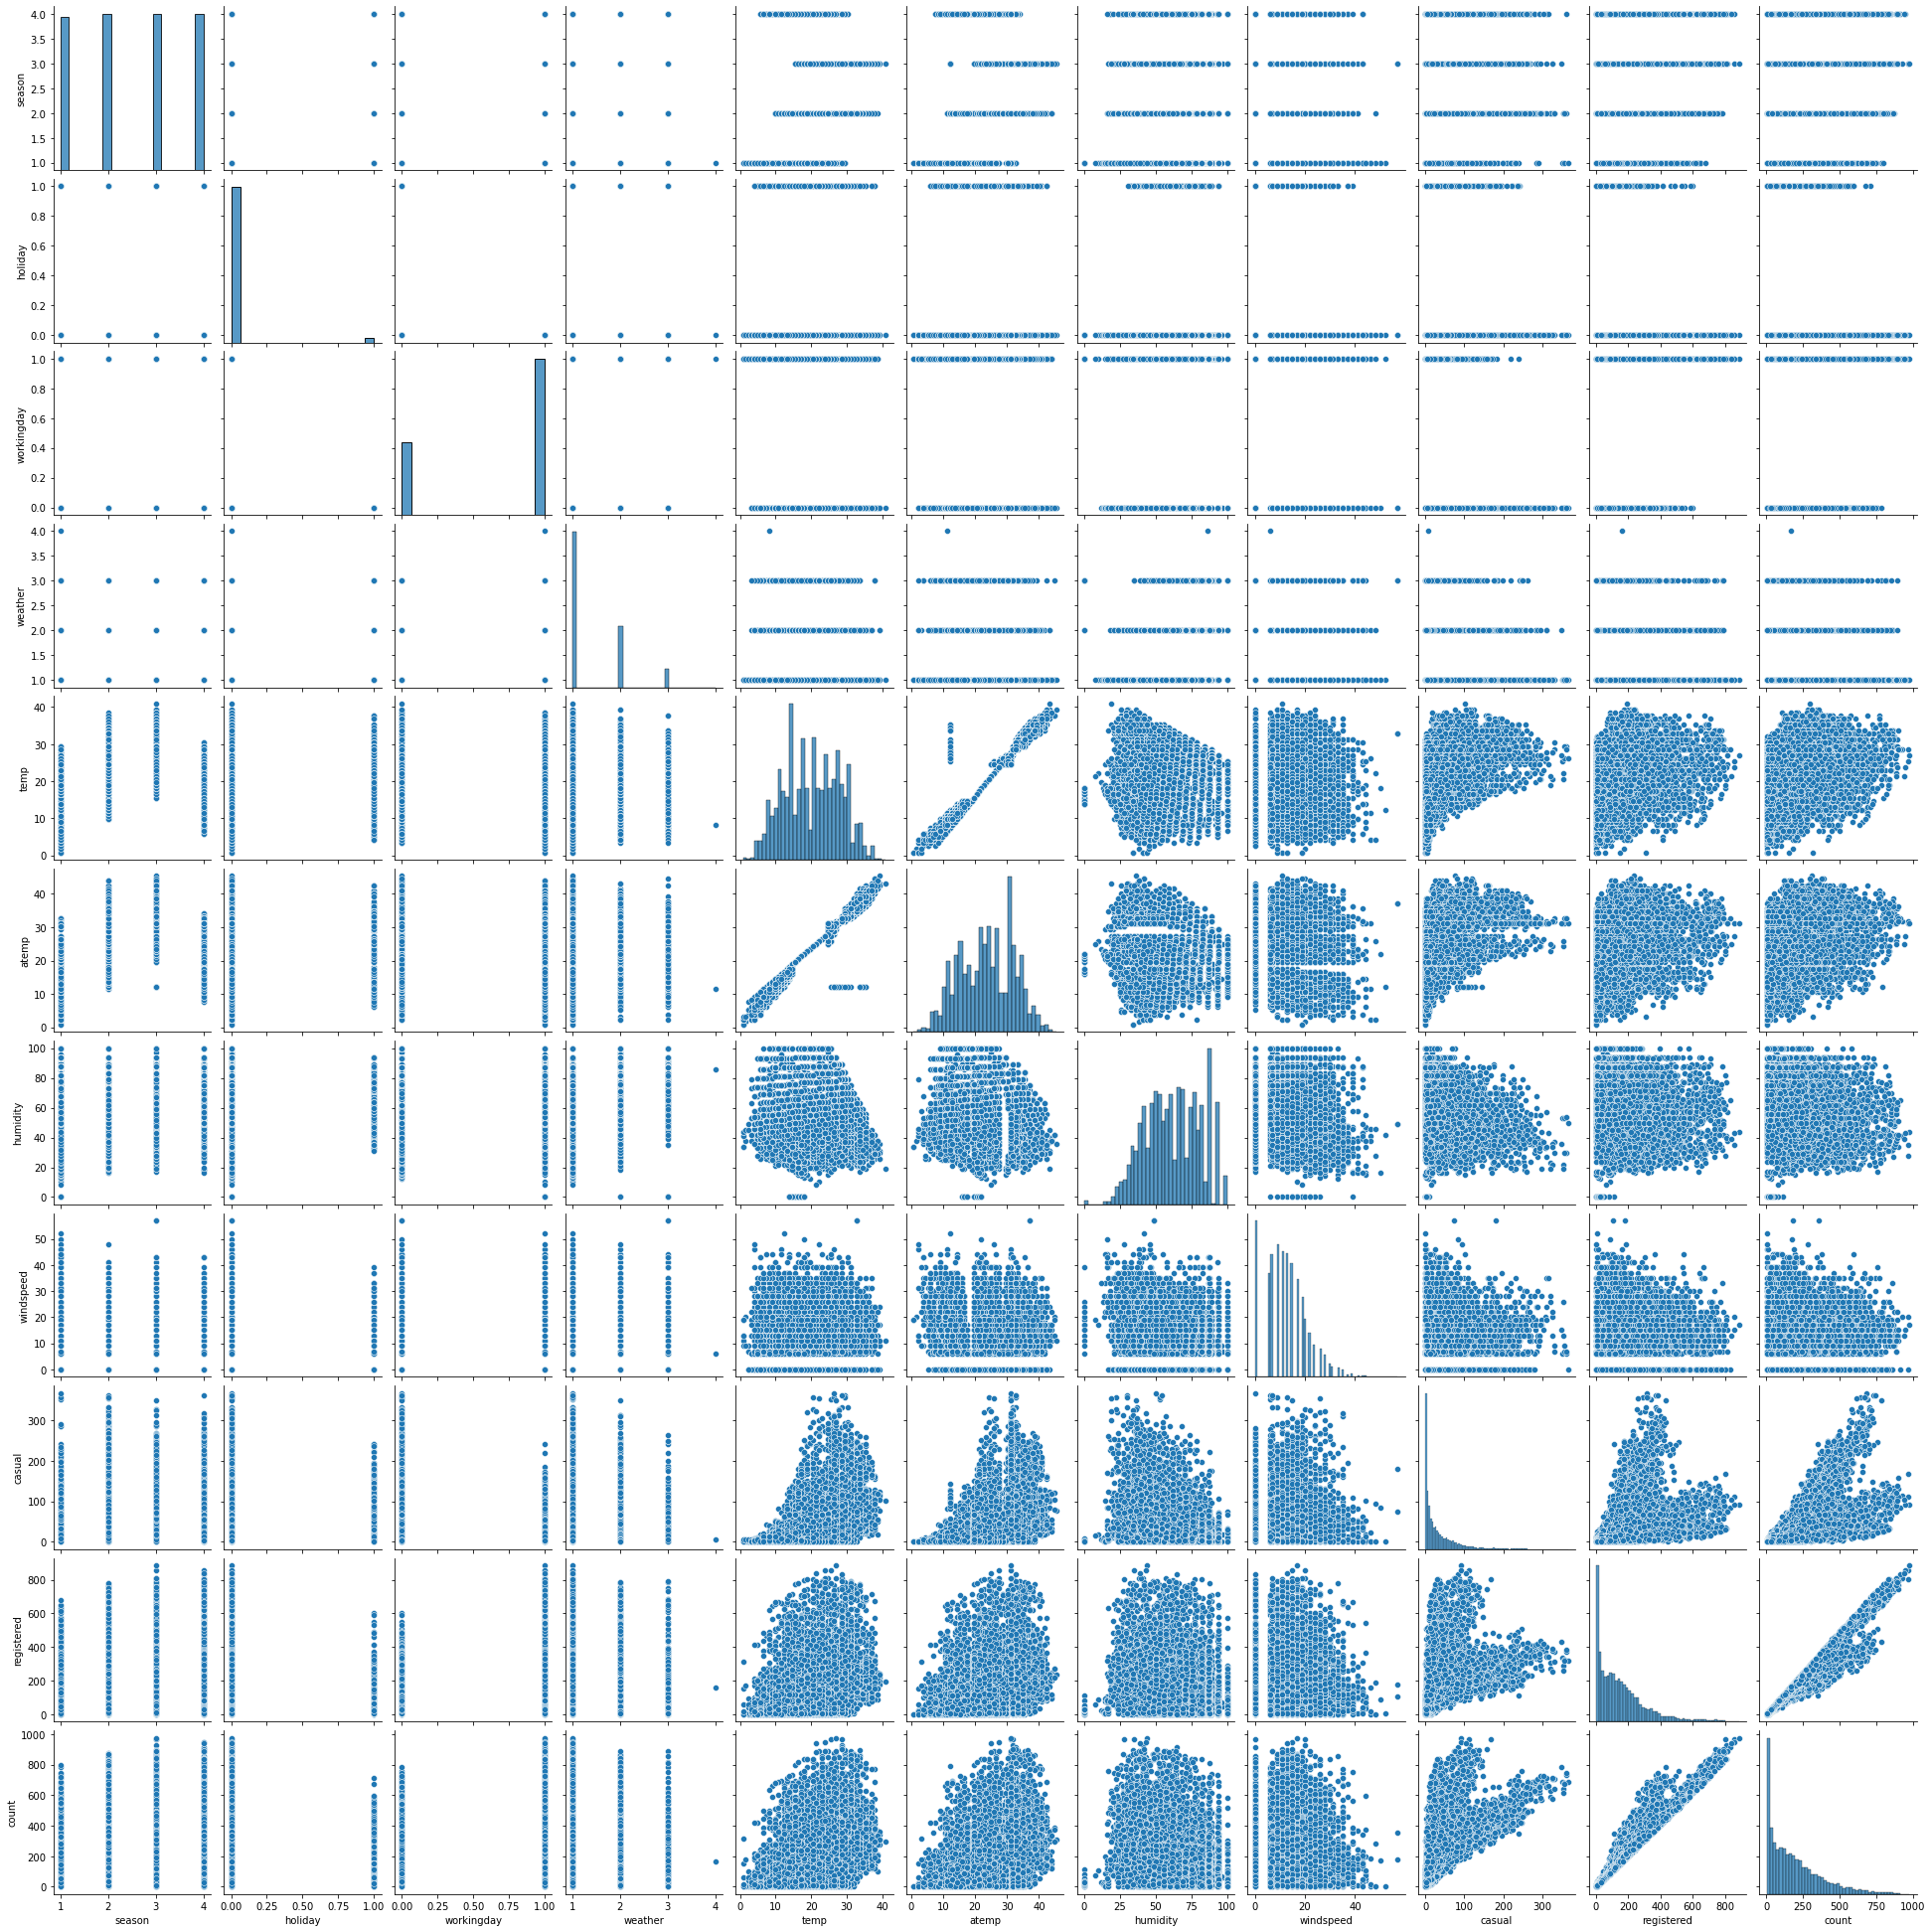

In [91]:
sns.pairplot(df)

<AxesSubplot:xlabel='datetime', ylabel='count'>

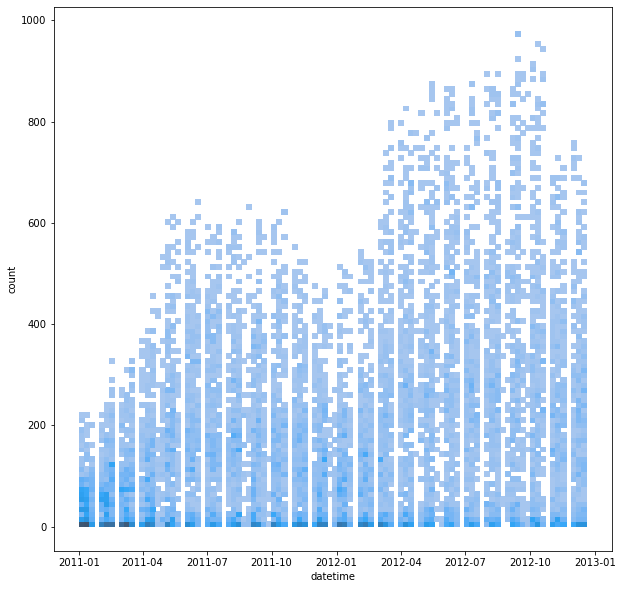

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data=df, y='count', x= df.index, bins=100)

### Feature Engineering

In [64]:
df.index.shape

(10886,)

In [65]:
df['year'] = df.index.year

In [66]:
df['month'] = df.index.month

In [67]:
df['week'] = df.index.isocalendar().week

In [68]:
df['day'] = df.index.day

In [69]:
df['hour'] = df.index.hour

In [70]:
df['weekday'] = df.index.weekday

In [ ]:
sns.histplot(data=df, y='count', x= 'day', bins=100)

<AxesSubplot:xlabel='datetime'>

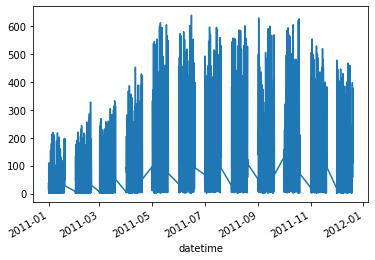

In [151]:
df.loc['2011', 'count'].plot()

<AxesSubplot:xlabel='datetime'>

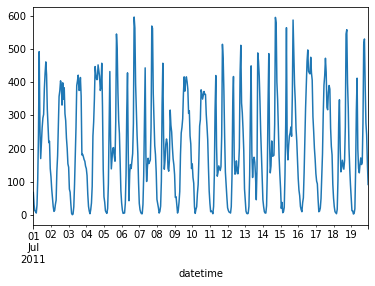

In [150]:
df.loc['2011/7', 'count'].plot()

<AxesSubplot:xlabel='datetime'>

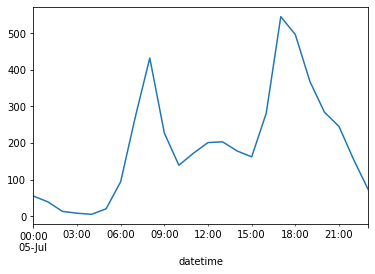

In [148]:
df.loc['2011/7/5', 'count'].plot()

In [158]:
df.groupby(by=[df.index.month, df.index.year]).mean()

season   holiday  workingday   weather       temp  \
datetime datetime                                                      
1        2011         1.0  0.055684    0.612529  1.440835   8.633782   
         2012         1.0  0.103753    0.631347  1.362031  10.987638   
2        2011         1.0  0.000000    0.733184  1.378924  11.331076   
         2012         1.0  0.000000    0.683516  1.536264  12.256747   
3        2011         1.0  0.000000    0.735426  1.466368  14.063184   
         2012         1.0  0.000000    0.685714  1.362637  17.704791   
4        2011         2.0  0.052747    0.630769  1.619780  17.776879   
         2012         2.0  0.052863    0.682819  1.244493  19.661938   
5        2011         2.0  0.000000    0.736842  1.528509  21.528596   
         2012         2.0  0.000000    0.736842  1.526316  23.819561   
6        2011         2.0  0.000000    0.684211  1.278509  28.191096   
         2012         2.0  0.000000    0.684211  1.339912  25.937895   
7        2011         3.0  0.052632    0.631579  1.184211  29.967763   
         2012         3.0  0.052632    0.684211  1.326754  31.715658   
8        2011         3.0  0.000000    0.789474  1.344298  29.667456   
         2012         3.0  0.000000    0.684211  1.359649  29.805921   
9        2011         3.0  0.052980    0.629139  1.618102  25.141236   
         2012         3.0  0.052632    0.631579  1.368421  26.412632   
10       2011         4.0  0.052747    0.630769  1.534066  20.903692   
         2012         4.0  0.052632    0.736842  1.521930  20.963947   
11       2011         4.0  0.052632    0.684211  1.333333  16.036754   
         2012         4.0  0.052747    0.630769  1.384615  14.332879   
12       2011         4.0  0.000000    0.684211  1.392544  12.897018   
         2012         4.0  0.000000    0.684211  1.592105  14.765395   

                       atemp   humidity  windspeed     casual  registered  \
datetime datetime                                                           
1        2011      10.767981  56.308585  13.749830   4.658933   49.986079   
         2012      13.323576  55.534216  15.375627  11.576159  112.777042   
2        2011      13.999922  53.580717  15.509298   8.466368   65.174888   
         2012      15.054758  58.958242  12.448688  12.134066  133.512088   
3        2011      16.895594  55.923767  16.033866  17.735426   69.114350   
         2012      21.096879  57.417582  14.705896  37.683516  170.593407   
4        2011      21.239835  66.285714  15.844234  26.876923   84.149451   
         2012      23.374295  45.085903  15.317366  60.757709  196.698238   
5        2011      25.455143  71.421053  12.355358  34.791667  140.017544   
         2012      27.809605  64.747807  12.232554  55.745614  208.364035   
6        2011      32.150910  58.291667  11.930099  42.982456  153.894737   
         2012      29.826590  59.228070  12.767761  63.539474  223.646930   
7        2011      34.011656  60.403509  11.960793  57.335526  146.278509   
         2012      35.789134  56.401316  10.079063  54.390351  212.646930   
8        2011      33.461711  62.166667  12.480543  38.552632  144.114035   
         2012      32.782292  63.855263  11.381816  62.039474  223.530702   
9        2011      28.693256  74.830022  11.501445  40.421634  134.200883   
         2012      30.481338  67.155702  11.649463  60.504386  232.094298   
10       2011      24.760231  71.571429  10.971832  37.712088  137.061538   
         2012      24.719178  67.258772  11.480523  45.894737  234.614035   
11       2011      19.417303  64.127193  12.112219  22.269737  133.188596   
         2012      17.232407  57.309890  14.143185  33.402198  198.578022   
12       2011      16.049868  65.280702  10.803133  11.138158  123.035088   
         2012      18.184572  71.486842  10.561845  21.098684  195.956140   

                        count    year  month       week        day       hour  \
datetime datetime                                             

<AxesSubplot:>

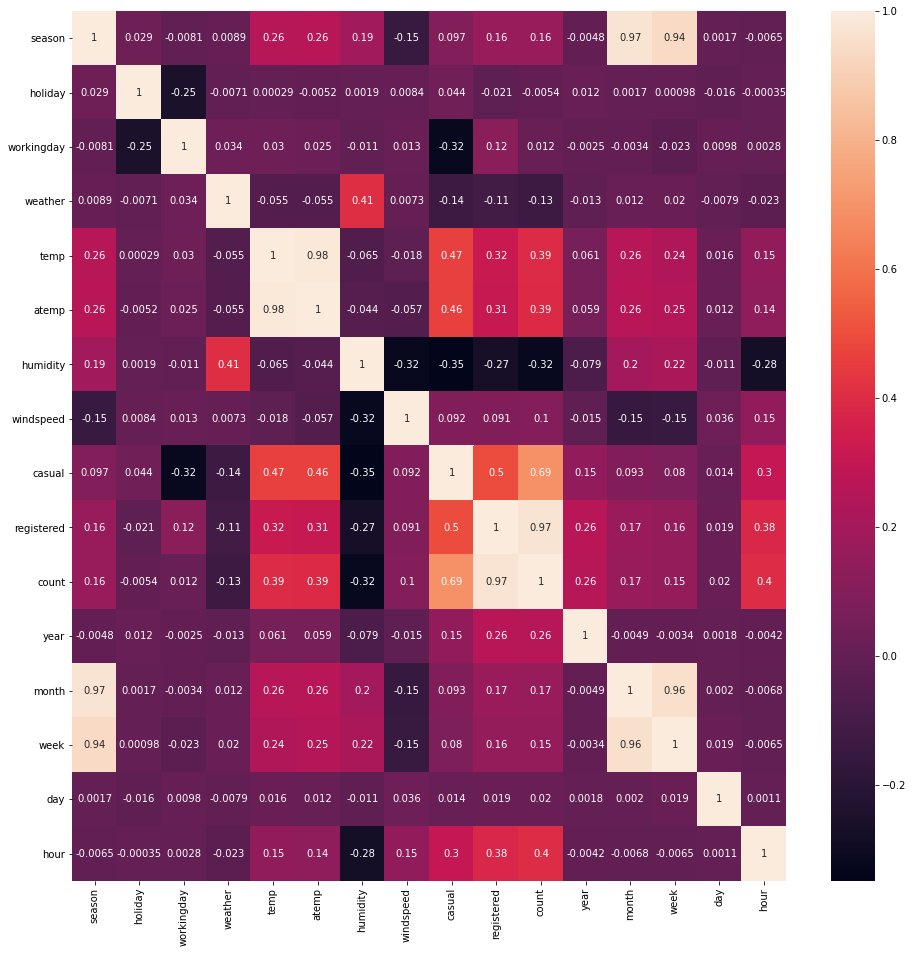

In [44]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(df.corr(), annot=True)

In [47]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,week,day,hour,weekday
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,52,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,52,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,52,1,2,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,52,1,3,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,52,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,51,19,19,2
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,51,19,20,2
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,51,19,21,2


In [49]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'week', 'day', 'hour', 'weekday'],
      dtype='object')

In [127]:
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'year', 'windspeed', 'week',
       'month', 'day', 'hour', 'weekday']]
y = df['count']

In [128]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,year,windspeed,week,month,day,hour,weekday
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,2011,0.0000,52,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,2011,0.0000,52,1,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,2011,0.0000,52,1,1,2,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,2011,0.0000,52,1,1,3,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,2011,0.0000,52,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,2012,26.0027,51,12,19,19,2
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,2012,15.0013,51,12,19,20,2
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,2012,15.0013,51,12,19,21,2


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [131]:
pipe_1 = make_pipeline(
   (OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
   (StandardScaler())
)

In [132]:
transformer = make_column_transformer(
    # (preprocessing, [list of column names])
    (pipe_1, ['season', 'holiday', 'workingday', 'weather', 'year', 'week', 'month', 'day', 'hour', 'weekday']),
    (StandardScaler(), ['temp', 'atemp', 'humidity', 'windspeed'])
#   ('passthrough', ['<Column Name>'])
)

In [133]:
# use the column transformer to fit it in the TRAIN data and transform the TEST data

transformer.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['season', 'holiday', 'workingday', 'weather',
                                  'year', 'week', 'month', 'day', 'hour',
                                  'weekday']),
                                ('standardscaler', StandardScaler(),
                                 ['temp', 'atemp', 'humidity', 'windspeed'])])

In [134]:
X_test_trans = transformer.transform(X_test)
X_train_trans = transformer.transform(X_train)

In [135]:
X_train_trans.shape

(8708, 126)

In [136]:
model = LinearRegression()
model.fit(X_train_trans, y_train)

LinearRegression()

In [137]:
model.score(X_train_trans, y_train)

0.6968761725564219

In [138]:
y_pred = model.predict(X_test_trans)

In [139]:
r2_score(y_test, y_pred)

0.697311261196981

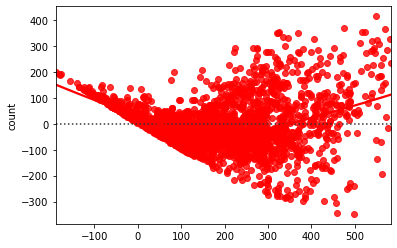

In [141]:
plt = sns.residplot(x = y_pred, y = y_test,lowess = True,color = 'r')

In [144]:
from sklearn.metrics import mean_squared_log_error

for i in range(len(y_pred)):
    y_pred[i] = max(1,i)

print(np.sqrt(mean_squared_log_error(y_test, y_pred )))

2.724636296479888


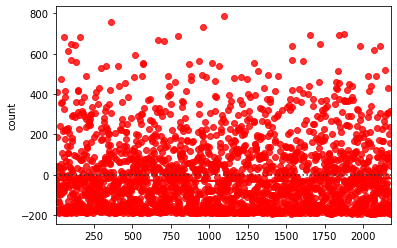

In [145]:
plt = sns.residplot(x = y_pred, y = y_test,lowess = True,color = 'r')